<h2 style="color:blue" align="left">Tensorboard for neural network</h2>

### 1. We classify handwritten digits by a simple neural network which has only input and output layers. 
### 2. Then, we add a hidden layer 
### 3. We check how the performance of the model improves by Tensorboard

In [15]:
%pip install tensorflow[and-cuda]
import tensorflow as tf
import datetime
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='layers_flatten'),
    tf.keras.layers.Dense(512, activation='relu', name='layers_dense'),
    tf.keras.layers.Dropout(0.2, name='layers_dropout'),
    tf.keras.layers.Dense(10, activation='softmax', name='layers_dense_2')
  ])

model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2173 - accuracy: 0.9357 - val_loss: 0.1121 - val_accuracy: 0.9660
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0979 - accuracy: 0.9689 - val_loss: 0.0852 - val_accuracy: 0.9731
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0692 - accuracy: 0.9778 - val_loss: 0.0733 - val_accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0537 - accuracy: 0.9831 - val_loss: 0.0694 - val_accuracy: 0.9778
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0429 - accuracy: 0.9860 - val_loss: 0.0668 - val_accuracy: 0.9790


<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

len(X_train): 60000
len(X_test): 10000
X_train[0].shape: (28, 28)


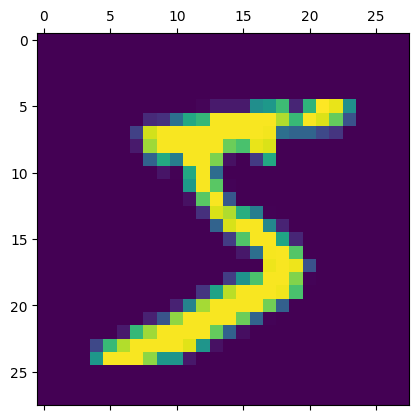

In [16]:
# Load the TensorBoard notebook extension
#%load_ext tensorboard
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import datetime

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
print('len(X_train):', len(X_train))
print('len(X_test):', len(X_test))
print('X_train[0].shape:', X_train[0].shape)
plt.matshow(X_train[0])

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)
# model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])
log_dir = "logs/adam/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=X_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(X_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1384 - accuracy: 0.8204 - val_loss: 0.5840 - val_accuracy: 0.8685
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3904 - accuracy: 0.9065 - val_loss: 0.3804 - val_accuracy: 0.9209
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2813 - accuracy: 0.9281 - val_loss: 0.3026 - val_accuracy: 0.9307
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2500 - accuracy: 0.9376 - val_loss: 0.2498 - val_accuracy: 0.9372
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2316 - accuracy: 0.9423 - val_loss: 0.3083 - val_accuracy: 0.9326


In [18]:
# Instead of Adam, we can try 'SGD'
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/sgd/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=X_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(X_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 21.6084 - accuracy: 0.1230 - val_loss: 2.2246 - val_accuracy: 0.1501
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2007 - accuracy: 0.1685 - val_loss: 2.2250 - val_accuracy: 0.1454
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2313 - accuracy: 0.1492 - val_loss: 2.2624 - val_accuracy: 0.1298
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2400 - accuracy: 0.1418 - val_loss: 2.2364 - val_accuracy: 0.1389
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2180 - accuracy: 0.1498 - val_loss: 2.1927 - val_accuracy: 0.1547


In [19]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [20]:
model.get_weights()

[array([[-0.03777809,  0.03946457, -0.05444461, ...,  0.01450007,
          0.03856382,  0.03249737],
        [-0.01317548,  0.04011893,  0.07857892, ...,  0.00768461,
          0.07394364,  0.02023258],
        [ 0.07851017,  0.05699196, -0.06084046, ..., -0.07273941,
          0.01666097,  0.0264388 ],
        ...,
        [ 0.05647504,  0.03283514,  0.03046449, ...,  0.07060611,
         -0.05676516, -0.06701364],
        [ 0.00994817,  0.00740404, -0.00104497, ..., -0.04194532,
         -0.02855016,  0.0594563 ],
        [-0.02213819, -0.05224202,  0.0556024 , ...,  0.01346416,
          0.01458053, -0.0160618 ]], dtype=float32),
 array([-0.00837102, -0.00033722, -0.0003824 , -0.0030044 , -0.0007525 ,
        -0.00106173, -0.00091455, -0.00285553, -0.00072877, -0.01959831,
        -0.00014175, -0.00039523, -0.00294272, -0.00102979, -0.00052589,
        -0.00084876, -0.00171835, -0.00096819, -0.00350128, -0.00086571,
        -0.00160016, -0.00355744, -0.00055508, -0.00970909, -0.001